In [9]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter

## Polygon Function

In [10]:
def polygon(t,n):
    l=int(t/n)
    th=2*(np.pi)*1/n
    x=[]
    y=[]
    for i in range(n):
        x.append(1*np.cos(i*th))
        y.append(1*np.sin(i*th))
        
    tx=[]
    ty=[]
    for i in range(n):
        if i==n-1:
            tx.append(np.linspace(x[i],x[0],l))
            ty.append(np.linspace(y[i],y[0],l))
        else:
            tx.append(np.linspace(x[i],x[i+1],l))
            ty.append(np.linspace(y[i],y[i+1],l))


    xs=np.concatenate(tx)
    ys=np.concatenate(ty)
    return xs,ys

The polygon(t,n) function takes two arguments t and n where t represents the turtle or pen object used to draw the polygon and n represents the number of sides of the polygon.

The function first calculates the length of each side of the polygon as l, and the angle between each side as th. It then generates x and y coordinates for each vertex of the polygon using trigonometry.

Next, the function generates l points between each pair of adjacent vertices using the np.linspace() function, and stores the x and y coordinates of these points in tx and ty respectively.

Finally, the function concatenates all the x and y coordinates generated for each pair of adjacent vertices, and returns them as two arrays xs and ys representing the coordinates of all the points that need to be drawn to create the polygon.

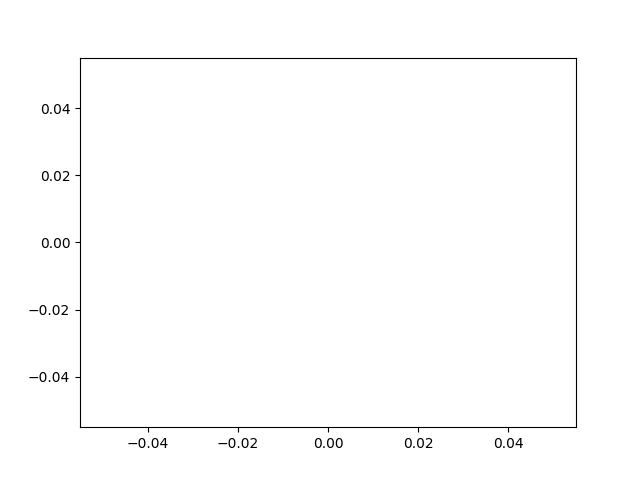

In [15]:
t=840
n=3
x=0
y=0
def func(t,n,x,y):
    if x==0 or y==0:
        xc, yc = polygon(t,n-1)
        xs, ys = polygon(t,n)
        return xs,ys,xc,yc
    if x==1 and y!=0 :
        xc, yc = polygon(t,n+1)
        xs, ys = polygon(t,n)
        return xs,ys,xc,yc
    
    
fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = ax.plot([], [], 'b')


def init():
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    return ln,

def update(frame):
    global n,x,y
    if frame==0 and x==1 and n>3:
        if n==8:
            y=1
        n=n-1
    if frame==0 and x==0:
        n=n+1
        if n==8:
            x=1
    xs,ys,xc,yc=func(t,n,x,y)
    xdata, ydata = morph(xs, ys, xc, yc, frame)
    ln.set_data(xdata, ydata)
    return ln,



def morph(x1, y1, x2, y2, alpha):
    xm = alpha * x1 + (1-alpha) * x2
    ym = alpha * y1 + (1-alpha) * y2
    return xm, ym


frames = []
for i in range(11):
    if i == 5:
        frames.extend(np.linspace(1, 1, 30))
    else:
        frames.extend(np.linspace(0, 1, 60))


ani = FuncAnimation(fig, update, frames=frames,init_func=init, blit=True, interval=10, repeat=False)
plt.show(ani)


This code uses the matplotlib library to create a morphing animation between two different polygons.

The func(t,n,x,y) function generates the x and y coordinates for two different polygons using the polygon(t,n) function. Depending on the values of x and y, the function generates polygons with a different number of sides.

The init() function initializes the plot axes and the update(frame) function updates the plot for each frame of the animation. It uses the morph(x1, y1, x2, y2, alpha) function to interpolate between the x and y coordinates of the two polygons at each frame.

The frames list generates a sequence of frames for the animation, where the polygon gradually morphs from one shape to another.

Finally, the FuncAnimation() function creates the animation using the update function and the sequence of frames.

In [16]:
from matplotlib.animation import PillowWriter

writer = PillowWriter(fps=25)
ani.save("animation.gif", writer=writer)
